In [2]:
import pandas as pd
import numpy as np

#### 데이터 불러오기 & 전처리

In [3]:
df = pd.read_csv('C:/Users/tjoeun/Downloads/미니프로젝트/데이터/finaldata.csv')

In [4]:
df.head(1)

,Unnamed: 0,전용면적,거래금액,층,건축년도,계약년월일,면적당가격,구,동,계약년,...,유로,소비자물가지수,소비자물가지수(전월 대비 증감률),KOSPI_종가,KOSDAQ_종가,무담보콜금리(1일),KORIBOR(3개월),CD(91일),국고채(1년),국고채(10년)
0,0,59.97,21100,8,2006,2007-01-01,351.842588,강동구,길동,2007,...,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04


In [5]:
df = df.rename(columns={'면적당가격':'price_per_m2',
                        '구':'gu',
                        '동':'dong',
                        '년월':'month',
                        '주택담보대출(연%)':'loan',
                        '미국달러':'dollar',
                        '일본엔':'jpn',
                        '유로':'eu',
                        '소비자물가지수':'cpi',
                        '  KOSPI_종가':'kospi',
                        '  KOSDAQ_종가':'kosdaq',
                        '  무담보콜금리(1일)':'call',
                        'KORIBOR(3개월)':'koribor',
                        'CD(91일)':'cd',
                        '국고채(1년)':'gb1y',
                        '국고채(10년)':'gb10y'})

In [6]:
df['month'] = pd.to_datetime(df['month'], format='%Y%m')
df['month'] = df['month'].dt.strftime('%y-%m')

In [7]:
# 컬럼 선택
df1 = df[['month', 'gu', 'dong', 'price_per_m2', 
          'loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'koribor', 'cd', 'gb1y', 'gb10y']]

#### r,p값 분석
* OLS 사용

In [8]:
# 특정 동만 추출한 테스트셋
df_test = df1.loc[df1['dong'] == '서초동']
# 월별로 평균내기????
# df_test.groupby('month').mean()

In [9]:
df_test

,month,gu,dong,price_per_m2,loan,dollar,jpn,eu,cpi,kospi,kosdaq,call,koribor,cd,gb1y,gb10y
11,07-01,서초구,서초동,444.886423,6.11,940.9,7.7310,1220.07,76.496,1360.23,576.37,4.630,4.91,4.92,4.980,5.040
61,07-01,서초구,서초동,415.241817,6.11,940.9,7.7310,1220.07,76.496,1360.23,576.37,4.630,4.91,4.92,4.980,5.040
249,07-01,서초구,서초동,788.691379,6.11,940.9,7.7310,1220.07,76.496,1360.23,576.37,4.630,4.91,4.92,4.980,5.040
516,07-01,서초구,서초동,437.251562,6.11,940.9,7.7310,1220.07,76.496,1360.23,576.37,4.630,4.91,4.92,4.980,5.040
712,07-01,서초구,서초동,887.847148,6.11,940.9,7.7310,1220.07,76.496,1360.23,576.37,4.630,4.91,4.92,4.980,5.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117598,23-01,서초구,서초동,959.681999,4.58,1228.7,9.4222,1332.83,110.100,2425.08,740.49,3.269,3.74,3.80,3.584,3.411
1117604,23-01,서초구,서초동,2422.611036,4.58,1228.7,9.4222,1332.83,110.100,2425.08,740.49,3.269,3.74,3.80,3.584,3.411
1117626,23-01,서초구,서초동,2163.421534,4.58,1228.7,9.4222,1332.83,110.100,2425.08,740.49,3.269,3.74,3.80,3.584,3.411
1117651,23-01,서초구,서초동,959.681999,4.58,1228.7,9.4222,1332.83,110.100,2425.08,740.49,3.269,3.74,3.80,3.584,3.411


In [10]:
X=df1[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'koribor', 'cd', 'gb1y', 'gb10y']]
y=df1['price_per_m2']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          3.673e+05
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                        0.00
Time:                        11:55:21   Log-Likelihood:                     -8.2394e+06
No. Observations:             1117750   AIC:                                  1.648e+07
Df Residuals:                 1117738   BIC:                                  1.648e+07
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan        -104.6326      1.975    -52.981      0.000    -108.503    -100.762
dollar         0.3793      0.011     35.459      0.000       0.358       0.400
jpn           -2.4856      0.458     -5.424      0.000      -3.384      -1.587
eu             0.5032      0.007     74.053      0.000       0.490       0.517
cpi           -9.2656      0.143    -64.700      0.000      -9.546      -8.985
kospi          0.2997      0.003     95.203      0.000       0.294       0.306
kosdaq         0.6011      0.006     95.844      0.000       0.589       0.613
call        -578.1769      3.702   -156.176      0.000    -585.433    -570.921
koribor      855.7724     10.094     84.782      0.000     835.989     875.556
cd          -186.7898     10.090    -18.513      0.000    -206.565    -167.014
gb1y         -46.7397      3.865    -12.094      0.000     -54.314     -39.165
gb10y       -106.1977      1.688    -62.910      0.000    -109.506    -102.889
==============================================================================
Omnibus:                   587220.945   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5827061.272
Skew:                           2.342   Prob(JB):                         0.00
Kurtosis:                      13.158   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X=df_test[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'koribor', 'cd', 'gb1y', 'gb10y']]
y=df_test['price_per_m2']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

## 전체 데이터보다 같은 동 데이터만 추출해서 하는게 r값이 더 높음.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.041e+04
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                        0.00
Time:                        11:55:21   Log-Likelihood:                     -1.1612e+05
No. Observations:               15859   AIC:                                  2.323e+05
Df Residuals:                   15847   BIC:                                  2.324e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan        -107.2508     15.821     -6.779      0.000    -138.262     -76.240
dollar         0.1006      0.083      1.209      0.227      -0.062       0.264
jpn            3.1113      3.532      0.881      0.378      -3.811      10.034
eu             0.4406      0.052      8.555      0.000       0.340       0.542
cpi           -2.7233      1.095     -2.488      0.013      -4.869      -0.578
kospi          0.2147      0.025      8.633      0.000       0.166       0.263
kosdaq         0.9284      0.051     18.153      0.000       0.828       1.029
call        -617.7467     29.421    -20.997      0.000    -675.415    -560.078
koribor      702.3626     81.737      8.593      0.000     542.149     862.576
cd           -37.7568     82.471     -0.458      0.647    -199.409     123.896
gb1y         -30.3696     28.260     -1.075      0.283     -85.762      25.022
gb10y       -100.7509     12.709     -7.927      0.000    -125.663     -75.839
==============================================================================
Omnibus:                     4508.650   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16870.313
Skew:                           1.388   Prob(JB):                         0.00
Kurtosis:                       7.221   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X=df_test[['loan']]
y=df_test['price_per_m2']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                          3.181e+04
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                        0.00
Time:                        11:55:21   Log-Likelihood:                     -1.2471e+05
No. Observations:               15859   AIC:                                  2.494e+05
Df Residuals:                   15858   BIC:                                  2.494e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan         217.6799      1.220    178.357      0.000     215.288     220.072
==============================================================================
Omnibus:                     2393.551   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4731.134
Skew:                           0.934   Prob(JB):                         0.00
Kurtosis:                       4.916   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 회귀모형 그래프

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='price_per_m2'>

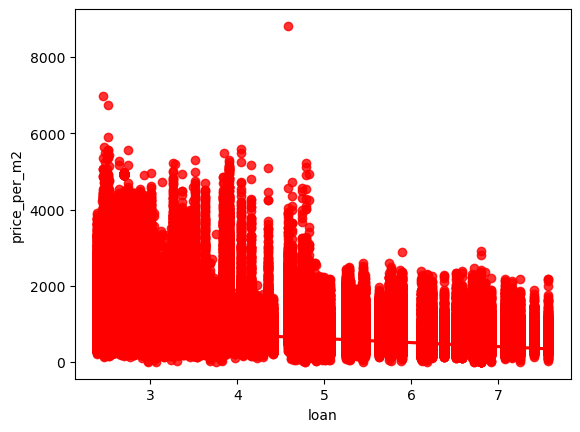

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#대출금리와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('loan','price_per_m2', df1, color='red')

<AxesSubplot:xlabel='dollar', ylabel='price_per_m2'>

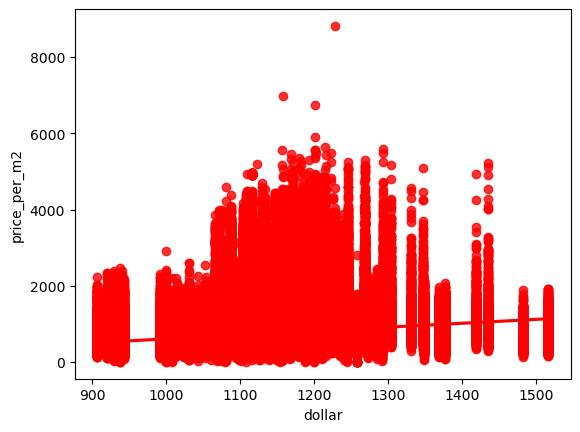

In [14]:
#dollar와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('dollar','price_per_m2', df1, color='red')

In [15]:
#jpn와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('jpn','price_per_m2', df1, color='red')

In [16]:
#eu와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('eu','price_per_m2', df1, color='red')

In [17]:
#cpi와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('cpi','price_per_m2', df1, color='red')

In [18]:
#kospi와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('kospi','price_per_m2', df1, color='red')

In [19]:
#kosdaq와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('kosdaq','price_per_m2', df1, color='red')

In [20]:
#call와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('call','price_per_m2', df1, color='red')

In [21]:
#koribor와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('koribor','price_per_m2', df1, color='red')

In [22]:
#cd와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('cd','price_per_m2', df1, color='red')

In [23]:
#gb1y와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('gb1y','price_per_m2', df1, color='red')

<AxesSubplot:xlabel='gb10y', ylabel='price_per_m2'>

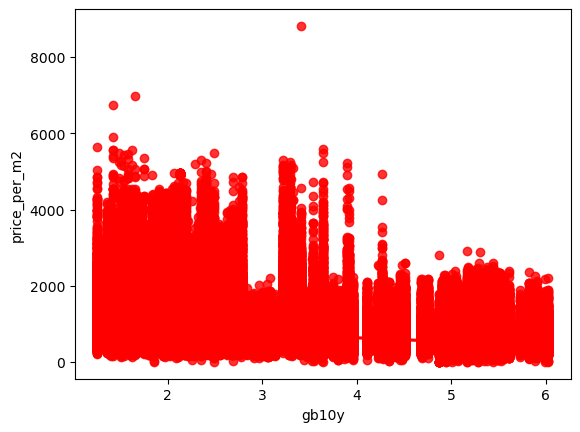

In [24]:
#gb10y와 가격(상관관계) --> 독립변수별로 하나씩 만들기
# sns.regplot('gb10y','price_per_m2', df1, color='red')

#### 데이터 학습

In [25]:
df_test.head(2)

,month,gu,dong,price_per_m2,loan,dollar,jpn,eu,cpi,kospi,kosdaq,call,koribor,cd,gb1y,gb10y
11,07-01,서초구,서초동,444.886423,6.11,940.9,7.731,1220.07,76.496,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
61,07-01,서초구,서초동,415.241817,6.11,940.9,7.731,1220.07,76.496,1360.23,576.37,4.63,4.91,4.92,4.98,5.04


In [26]:
# 연속형이 아닌 컬럼 삭제
df_test = df_test.drop(['month', 'gu', 'dong'], axis=1)

In [27]:
# 스케일링
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(df_test)
scaled_df = scaler.transform(df_test)

In [46]:
#데이터셋을 나눔(학습용:검증용 = 7:3)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_test[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'koribor', 'cd', 'gb1y', 'gb10y']]      #2차원 배열로 넣기
y = df_test['price_per_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_train, y_train)

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
# 평균제곱근오차 : 예측값과 실제값을 뺀 후 제곱한 값들을 다 더하고 n으로 나눈 값의 제곱근(평균제곱오차의 제곱근)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

366.9157624573297


In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

346.19609634094405


In [31]:
from sklearn.svm import SVR

#Support Vector Regression
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

382.02526757471446


In [32]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_jobs = -1)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
#가장 좋은 성능

346.3709307257682


In [47]:
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.35970070122495446
검증용: 0.3843636755596517


#### 변수 제거
* 다중공선성

In [35]:
dfX = df_test[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'koribor', 'cd', 'gb1y', 'gb10y']]
#변수들의 상관관계
dfX.corr()

,loan,dollar,jpn,eu,cpi,kospi,kosdaq,call,koribor,cd,gb1y,gb10y
loan,1.000000,-0.123606,0.333948,0.676634,-0.882493,-0.594153,-0.473242,0.817465,0.894050,0.888524,0.929552,0.958086
dollar,-0.123606,1.000000,0.553351,0.434586,0.152606,-0.219152,-0.181962,-0.471568,-0.384394,-0.384773,-0.371333,-0.079650
jpn,0.333948,0.553351,1.000000,0.745332,-0.297180,-0.384595,-0.582335,0.046972,0.129364,0.125204,0.153141,0.374609
eu,0.676634,0.434586,0.745332,1.000000,-0.608116,-0.559608,-0.580139,0.323391,0.430463,0.424142,0.476841,0.743727
cpi,-0.882493,0.152606,-0.297180,-0.608116,1.000000,0.764408,0.586661,-0.758086,-0.812706,-0.811779,-0.842622,-0.879090
kospi,-0.594153,-0.219152,-0.384595,-0.559608,0.764408,1.000000,0.808888,-0.513863,-0.560076,-0.566317,-0.561628,-0.601244
kosdaq,-0.473242,-0.181962,-0.582335,-0.580139,0.586661,0.808888,1.000000,-0.443077,-0.475185,-0.479368,-0.472406,-0.529721
call,0.817465,-0.471568,0.046972,0.323391,-0.758086,-0.513863,-0.443077,1.000000,0.984980,0.986540,0.958704,0.740896
koribor,0.894050,-0.384394,0.129364,0.430463,-0.812706,-0.560076,-0.475185,0.984980,1.000000,0.999365,0.985220,0.823248
cd,0.888524,-0.384773,0.125204,0.424142,-0.811779,-0.566317,-0.479368,0.986540,0.999365,1.000000,0.983122,0.816431


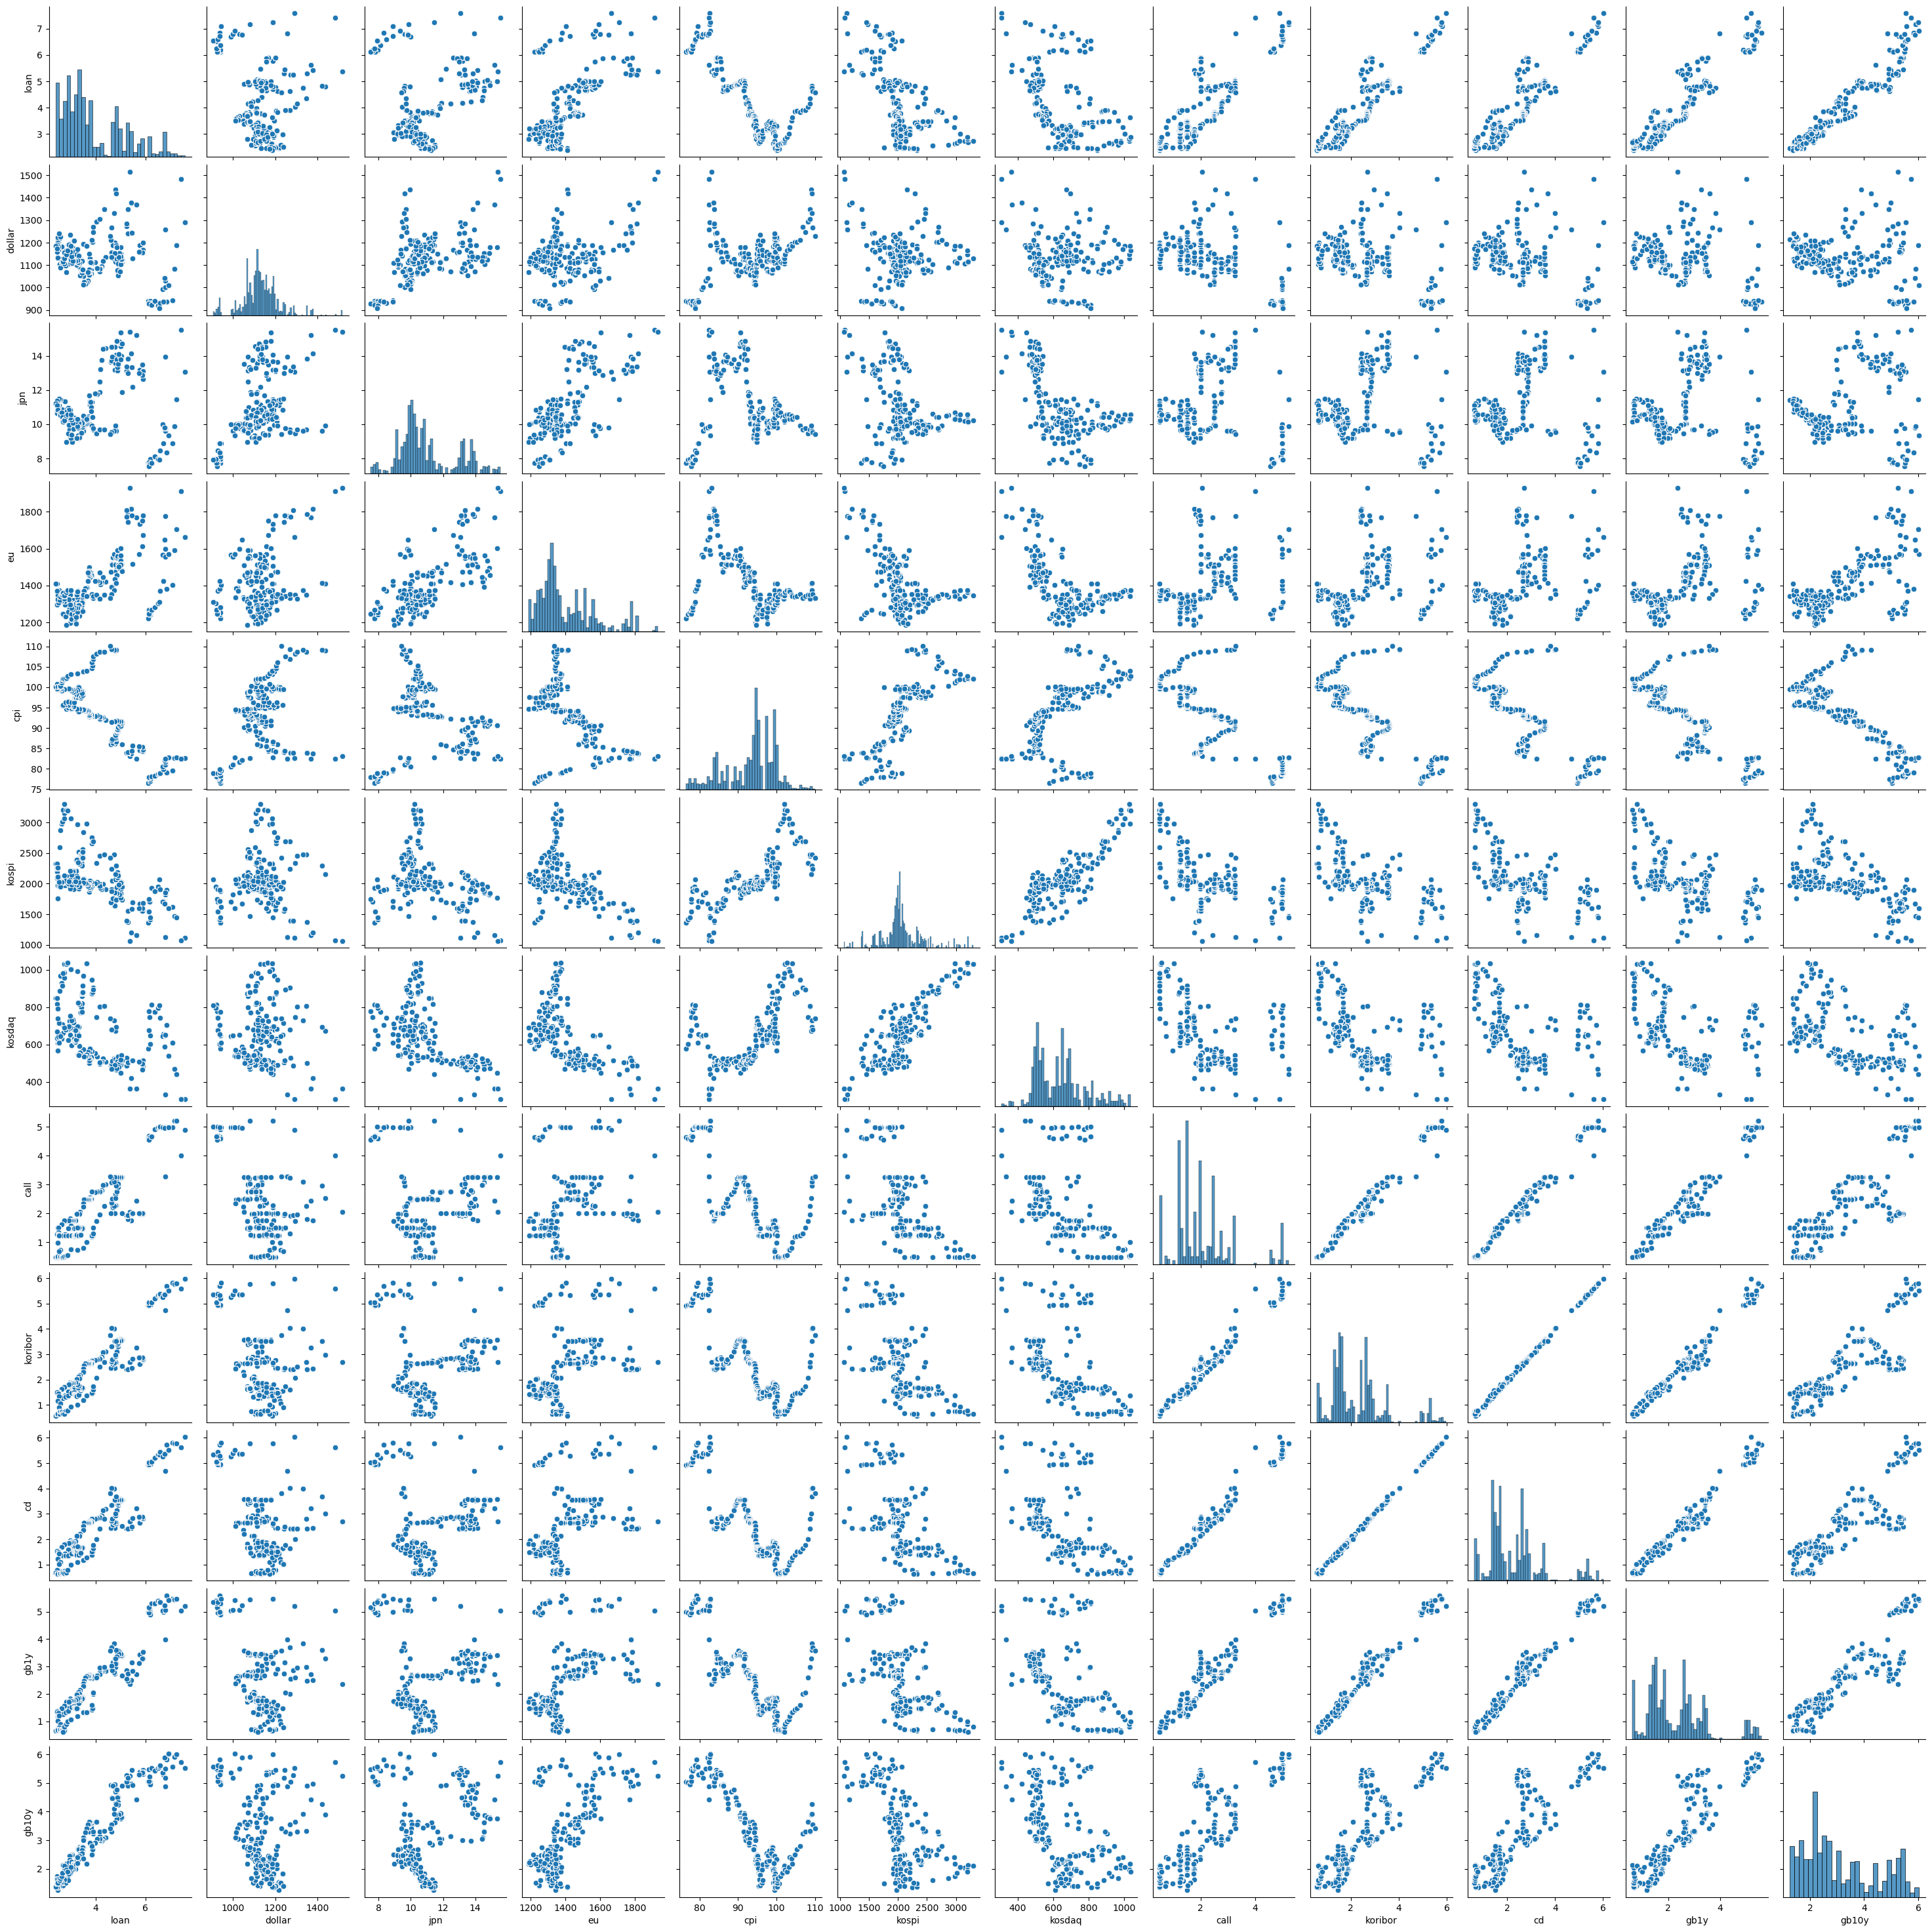

In [36]:
#독립변수들간의 상관관계 그래프
sns.pairplot(dfX)
plt.show()
# jpn, eu
# kospi, kosdaq
# loan, call, koribor, cd, gb1y, gb10y (cpi는 얘네랑 상관계수는 높은데, 그래프는 다름)
# 서로 그래프 비슷

In [ ]:
#다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["변수"] = dfX.columns
vif = vif.sort_values("VIF").reset_index(drop=True)
vif

,VIF,변수
0,132.367139,kosdaq
1,183.380156,jpn
2,220.866720,gb10y
3,317.376669,kospi
4,496.392410,loan
5,541.134831,call
6,625.336509,eu
7,626.280860,gb1y
8,1049.882162,dollar
9,1239.913313,cpi


In [37]:
# 변수 제거 전 전체 값
dfX = df_test[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'koribor', 'cd', 'gb1y', 'gb10y']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 88.7
# cond 조건수 >> 1.10e+05

회귀계수
 loan      -107.250814
dollar       0.100605
jpn          3.111342
eu           0.440565
cpi         -2.723342
kospi        0.214699
kosdaq       0.928367
call      -617.746651
koribor    702.362598
cd         -37.756824
gb1y       -30.369634
gb10y     -100.750903
dtype: float64
R-squared
 0.8874615463843346
P values
 loan       1.253036e-11
dollar     2.265757e-01
jpn        3.783297e-01
eu         1.289079e-17
cpi        1.285905e-02
kospi      6.509752e-18
kosdaq     6.625194e-73
call       1.440479e-96
koribor    9.254620e-18
cd         6.470883e-01
gb1y       2.825401e-01
gb10y      2.387701e-15
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.041e+04
Date:               

In [ ]:
# cd 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'koribor', 'gb1y', 'gb10y']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.7
# cond 조건수 >> 4.18e+04

회귀계수
 loan      -107.674332
dollar       0.097215
jpn          3.200303
eu           0.440241
cpi         -2.740631
kospi        0.216272
kosdaq       0.928557
call      -621.354351
koribor    668.368771
gb1y       -30.647265
gb10y     -100.173394
dtype: float64
R-squared
 0.8874600579049358
P values
 loan        9.593077e-12
dollar      2.407283e-01
jpn         3.641086e-01
eu          1.349093e-17
cpi         1.224541e-02
kospi       1.782511e-18
kosdaq      6.082673e-73
call       5.909469e-105
koribor     3.306236e-84
gb1y        2.780408e-01
gb10y       2.507945e-15
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.136e+04
Date:                Tue, 21 Mar 2023   Prob (F-statist

In [ ]:
# koribor 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'gb1y', 'gb10y']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.5
# cond 조건수 >> 3.15e+04

회귀계수
 loan       36.716976
dollar      0.310597
jpn        -3.303707
eu          0.454091
cpi        -6.241735
kospi       0.259323
kosdaq      0.751002
call     -175.650635
gb1y      138.754541
gb10y    -157.632100
dtype: float64
R-squared
 0.8847430773260732
P values
 loan      9.368793e-03
dollar    1.872197e-04
jpn       3.523960e-01
eu        3.194530e-18
cpi       1.114975e-08
kospi     1.843241e-25
kosdaq    6.839544e-49
call      8.859409e-25
gb1y      3.460551e-07
gb10y     1.413464e-36
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                          1.217e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:13:03   Log-

In [ ]:
# gb1y 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'call', 'gb10y']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.5
# cond 조건수 >>  1.49e+04

회귀계수
 loan       72.193993
dollar      0.181357
jpn        -0.795695
eu          0.370897
cpi        -4.220284
kospi       0.228896
kosdaq      0.774169
call      -97.384063
gb10y    -120.366897
dtype: float64
R-squared
 0.8845540290071634
P values
 loan      4.551757e-09
dollar    2.208861e-02
jpn       8.212159e-01
eu        7.287877e-14
cpi       3.430854e-05
kospi     2.589847e-21
kosdaq    3.849044e-52
call      8.013971e-39
gb10y     1.052510e-32
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          1.349e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:15:26   Log-Likelihood:                     -1.1632e+05


In [ ]:
# call 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq', 'gb10y']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.3
# cond 조건수 >>  1.24e+04

회귀계수
 loan     -38.541422
dollar     0.725091
jpn        2.023488
eu         0.384662
cpi      -12.422949
kospi      0.319597
kosdaq     0.885409
gb10y    -95.200601
dtype: float64
R-squared
 0.8833102727499336
P values
 loan      1.753566e-05
dollar    1.288631e-26
jpn       5.668467e-01
eu        1.159886e-14
cpi       3.486305e-53
kospi     7.315097e-43
kosdaq    1.146883e-68
gb10y     1.260172e-21
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                          1.500e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:16:11   Log-Likelihood:                     -1.1640e+05
No. Observations:               15859   AIC:        

In [ ]:
# eu 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'dollar', 'jpn', 'cpi', 'kospi', 'kosdaq', 'gb10y']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.3
# cond 조건수 >>   1.02e+04

회귀계수
 loan     -45.014701
dollar     0.932875
jpn       14.550066
cpi      -11.692988
kospi      0.317606
kosdaq     0.898052
gb10y    -56.775064
dtype: float64
R-squared
 0.8828706469372911
P values
 loan      4.967979e-07
dollar    2.722378e-50
jpn       3.754623e-06
cpi       8.054641e-48
kospi     3.278848e-42
kosdaq    2.168278e-70
gb10y     5.033047e-11
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                          1.707e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:17:05   Log-Likelihood:                     -1.1643e+05
No. Observations:               15859   AIC:                                  2.329e+05
Df Resi

In [ ]:
# kospi 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'dollar', 'jpn', 'cpi', 'kosdaq', 'gb10y']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.1
# cond 조건수 >> 5.10e+03

회귀계수
 loan     -87.950127
dollar     0.337249
jpn       37.717625
cpi       -3.321452
kosdaq     1.435299
gb10y    -20.845753
dtype: float64
R-squared
 0.88149296955199
P values
 loan      2.070407e-25
dollar    5.363257e-14
jpn       3.070420e-45
cpi       1.778720e-10
kosdaq    0.000000e+00
gb10y     1.175344e-02
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          1.965e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:17:39   Log-Likelihood:                     -1.1653e+05
No. Observations:               15859   AIC:                                  2.331e+05
Df Residuals:                   15853   BIC:        

In [ ]:
# gb10y 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'dollar', 'jpn', 'cpi', 'kosdaq']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.1
# cond 조건수 >> 1.36e+03

회귀계수
 loan     -108.093862
dollar      0.328861
jpn        37.425174
cpi        -3.126985
kosdaq      1.447956
dtype: float64
R-squared
 0.8814455072489132
P values
 loan      0.000000e+00
dollar    1.908528e-13
jpn       1.224978e-44
cpi       1.260590e-09
kosdaq    0.000000e+00
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          2.357e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:18:16   Log-Likelihood:                     -1.1653e+05
No. Observations:               15859   AIC:                                  2.331e+05
Df Residuals:                   15854   BIC:                                  2.331e+05


In [ ]:
# dollar 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'jpn', 'cpi', 'kosdaq']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.1
# cond 조건수 >>  680.

회귀계수
 loan     -104.128533
jpn        48.542695
cpi        -0.591045
kosdaq      1.442751
dtype: float64
R-squared
 0.8810402735686642
P values
 loan       0.000000e+00
jpn       1.004206e-106
cpi        1.227910e-01
kosdaq     0.000000e+00
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          2.936e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:18:51   Log-Likelihood:                     -1.1656e+05
No. Observations:               15859   AIC:                                  2.331e+05
Df Residuals:                   15855   BIC:                                  2.332e+05
Df Model:                           4   

In [ ]:
# jpn 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'cpi', 'kosdaq']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.1
# cond 조건수 >>  680.
# 제거 x

회귀계수
 loan     -69.418391
cpi        6.393255
kosdaq     1.047099
dtype: float64
R-squared
 0.877372001677731
P values
 loan      8.407224e-226
cpi       4.005785e-181
kosdaq     0.000000e+00
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                          3.782e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:20:07   Log-Likelihood:                     -1.1680e+05
No. Observations:               15859   AIC:                                  2.336e+05
Df Residuals:                   15856   BIC:                                  2.336e+05
Df Model:                           3                                                  
C

In [ ]:
# cpi 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
dfX = df_test[['loan', 'jpn', 'kosdaq']]
dfy = df_test['price_per_m2']
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정 >> 88.1
# cond 조건수 >>  598.
## 제거 x

회귀계수
 loan     -103.218484
jpn        45.748423
kosdaq      1.399548
dtype: float64
R-squared
 0.8810224044077926
P values
 loan       0.000000e+00
jpn       2.856944e-285
kosdaq     0.000000e+00
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          3.914e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:20:53   Log-Likelihood:                     -1.1656e+05
No. Observations:               15859   AIC:                                  2.331e+05
Df Residuals:                   15856   BIC:                                  2.331e+05
Df Model:                           3                                                

* 학습 점수

In [58]:
# 특정 동만 추출한 테스트셋
df_test2 = df1.loc[df1['dong'] == '서초동']
# 연속형이 아닌 컬럼 삭제
df_test2 = df_test2.drop(['month', 'gu', 'dong'], axis=1)

In [71]:
#전체 데이터
# 스케일링
from sklearn.preprocessing import StandardScaler

X = df_test2[['loan', 'dollar', 'jpn', 'eu', 'cpi', 'kospi', 'kosdaq',
          'call', 'koribor','cd','gb1y','gb10y']]      #2차원 배열로 넣기
y = df_test2['price_per_m2']

scaler = StandardScaler()
scaler.fit(df_test2)
scaled_df = scaler.transform(df_test2)

#데이터셋을 나눔(학습용:검증용 = 7:3)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_train0, y_train0)

In [72]:
print("학습용:",model.score(X_train0, y_train0))
print("검증용:",model.score(X_test0, y_test0))

학습용: 0.35970070122495446
검증용: 0.3843636755596517


In [73]:
#VIF 기준 삭제한 데이터
# 스케일링
from sklearn.preprocessing import StandardScaler

df_3 = df_test2[['price_per_m2', 'loan', 'jpn', 'cpi', 'kosdaq']]
X = df_3[['loan', 'jpn', 'cpi', 'kosdaq']]      #2차원 배열로 넣기
y = df_3['price_per_m2']

scaler = StandardScaler()
scaler.fit(df_3)
scaled_df = scaler.transform(df_3)

#데이터셋을 나눔(학습용:검증용 = 7:3)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_train, y_train)

In [74]:
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.3362778007968169
검증용: 0.3649132813934266


In [75]:
#p value 기준 삭제한 데이터
from sklearn.preprocessing import StandardScaler

df_4 = df_test2[['price_per_m2', 'dollar', 'eu', 'cpi', 'kosdaq', 'call','koribor','gb1y']]
X = df_4[['dollar', 'eu', 'cpi', 'kosdaq', 'call','koribor','gb1y']]      #2차원 배열로 넣기
y = df_4['price_per_m2']

scaler = StandardScaler()
scaler.fit(df_4)
scaled_df = scaler.transform(df_4)

#데이터셋을 나눔(학습용:검증용 = 7:3)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_train2, y_train2)

In [76]:
print("학습용:",model.score(X_train2, y_train2))
print("검증용:",model.score(X_test2, y_test2))

학습용: 0.3577527112601383
검증용: 0.3831880468529749


* vif & pvalue 높은 변수 제거, 스케일링 처리 한번에 하기
(잘 모르겠음)

In [61]:
#전체 데이터
def get_model1(seed):
    df_train, df_test = train_test_split(df_test2, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("price_per_m2 ~ scale(loan) + scale(dollar) + scale(jpn) + scale(eu) + scale(cpi) + scale(kospi) + scale(kosdaq) + scale(call) + scale(koribor) + scale(cd) + scale(gb1y) + scale(gb10y)", data=df_train)
    return df_train, df_test, model.fit()
df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     386.7
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:17:29   Log-Likelihood:                -57890.
No. Observations:                7929   AIC:                         1.158e+05
Df Residuals:                    7916   BIC:                         1.159e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        992.0806      4.030    246.

In [62]:
#VIF 기준 삭제한 데이터
def get_model2(seed):
    df_train, df_test = train_test_split(df_3, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("price_per_m2 ~ scale(loan) + scale(jpn) + scale(cpi) + scale(kosdaq)", data=df_train)
    return df_train, df_test, model.fit()
df_train, df_test, result2 = get_model2(3)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1044.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:17:34   Log-Likelihood:                -58041.
No. Observations:                7929   AIC:                         1.161e+05
Df Residuals:                    7924   BIC:                         1.161e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       992.0806      4.105    241.647

In [63]:
#p value 기준 삭제한 데이터
def get_model3(seed):
    df_train, df_test = train_test_split(df_3, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("price_per_m2 ~ scale(dollar)+ scale(eu) + scale(cpi) + scale(kosdaq) + scale(call) + scale(koribor) + scale(gb1y)", data=df_train)
    return df_train, df_test, model.fit()
df_train, df_test, result3 = get_model2(3)
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1044.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:21:35   Log-Likelihood:                -58041.
No. Observations:                7929   AIC:                         1.161e+05
Df Residuals:                    7924   BIC:                         1.161e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       992.0806      4.105    241.647

In [55]:
# Total Sum of Square(종속변수 y의 분산)
# Residual Sum of Square(잔차의 분산, 오차의 크기)
def calc_r2(df_test, result):
    target = df.loc[df_test.index].price_per_m2 #실제값
    predict_test = result.predict(df_test) #예측값
    RSS = ((predict_test - target)**2).sum() #잔차의 분산
    TSS = ((target - target.mean())**2).sum() #실제값의 분산
    return 1 - RSS / TSS #결정계수

In [56]:
# 테스트
test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))
test2

[0.33660408261185315,
 0.33188840652553464,
 0.34888129357202025,
 0.3457925117052614,
 0.34334655093179967,
 0.33892161356431394,
 0.34622716901483486,
 0.348080453760543,
 0.3482090397302309,
 0.35220619620285476]